#Libraries

In [47]:
#I wrote all of the explanatory text and comments in this notebook. The was adapted from https://github.com/eftekhar-hossain/Bangla-News-Headlines-Categorization/blob/master/news_headline_classification_GRU.ipynb

Author: Thaslima Nasreen Fazulur Rahman

Introduction: 
The project is about creating a tool which can be used to categorize the news headlines in Bengali, there are six categories such as National, Politics, Amusement, IT, International and Sports using a deep recurrent neural network. The dataset has been obtained from Github which is about .13 Million size. The semantic meaning of words in the headlines is extracted by a feature called word embedding. Deep learning model is built using the five layers such as The used model architecture consists of a embedding layer(input_length = 21, embedding_dim = 64), two dense layer (n_units = 24, 6), GRU layer(n_units = 64) and a dropout and a softmax layer. The datasets are prepared to feed into the model. Initially cleaning of data takes place by removing unwanted symbols such as punctuation using one of the python library regex and dataset which is having headline length less than 2 has been removed. The train_test_split method sklearn library is used to split the dataset as training, validation and test and Labelencoder technique is used to encode the categories. LabelEncoder is a method provided by sklearn library, it is used to assign numerical values  0 - n-1 to distinct values of particular column  for example, as there are 6 categories, it will assign 1 to IT, 0 to Amusement. Where n is the number of distinct values in categories.The next step is used to make these datasets to be suitable to send as input to the model. This is achieved by using methods provided by keras, mainly tokenizer, text_to_sequence and padded_sequence. There is a tokenizer class of keras is there which is utilized for vectorizing a text corpus(in our case it is the headline). In this text is converted into integer sequence or it could create a vector that will have coefficient for every token in all the headlines in the form of binary values. texts_to_sequence is an another method of tokenizer which is used to words of headlines into sequence of integer (Since unique value is assigned to each word)Pad_sequence is method which is used to pad each sequence of same length, here we are taking length to be 21. Every sequence will be padded to do 21 and its after the sequence since we give padding type as post,If maximum length is not given then longest sequence length will be taken.The above methods is implemented on all test,train and Valid data set. Then the model is trained and accuracy is tested by creating a convolution matrix. 
 
 


In [2]:
import numpy as np
#NumPy library is used to perform mathematical operation in array
import matplotlib.pyplot as plt
#matplotlib is used to create 
%matplotlib inline
#to enable inline plotting
import pandas as pd
#panda is used for data analyis
import seaborn as sns
#to create stastical graph in python
import re,nltk,json
#to use regex, nltk, json method
import tensorflow as tf
#to develop and train model
from tensorflow import keras
#developing and evaluating deeplearning model
from tensorflow.keras import regularizers
#to use a regularizer label
from tensorflow.keras.preprocessing.sequence import pad_sequences
#to implement padding on the dataset
from keras import models
#to create a model
from keras import layers
#to add layers to the model such as dense
from tensorflow.keras.layers import LSTM,GRU
#to use LSTM and GRU
from tensorflow.keras.models import load_model
#TO LOAD THE SAVED MODEL
from sklearn.metrics import confusion_matrix
#to create the confusion matrix
from sklearn.metrics import classification_report 
#to create classification report 
from sklearn.model_selection import train_test_split
#to split the data set as train and tes
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
# to calculate accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
# average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
# to implement encoder
from tensorflow.keras.preprocessing.text import Tokenizer
#to perform tokenizer
np.random.seed(42)
#generating pseudo random number
#creating a class to assign color 
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# dataset path
#path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/News Headline Classification/'

In [3]:


#We need a dataset to start, the dataset I have taken is .csv file which comprised of headlines, category and newspaper name.

#importing the library panda as we are going to convert .csv file into dataframe.
import pandas as pd

#the variable 'url' points to raw version of the dataset headlines.csv, this was hosted in github by the original author of this project in his github id. 
url = 'https://raw.githubusercontent.com/eftekhar-hossain/Bangla-News-Headlines-Categorization/master/headlines.csv'

#pd.read_csv is used to read a comma-separated values (csv) file into DataFrame data.
data = pd.read_csv(url)

print('The type of variable data\n', type(data))

# to show column names of newly created dataframe.
print('The list of columns of dataframe',list(data)) 

#examining the few lines of data frame, which can be done by 'head' method provided by panda
print('The few lines of data frame\n', data.head(6))

The type of variable data
 <class 'pandas.core.frame.DataFrame'>
The list of columns of dataframe ['headline', 'category', 'newspaper name']
The few lines of data frame
                                             headline   category newspaper name
0           হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!  Amusement       Jugantor
1                      এত দামি জুতা পরেন প্রিয়াঙ্কা!  Amusement       Jugantor
2                    মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও  Amusement       Jugantor
3           কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি  Amusement       Jugantor
4         বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা  Amusement       Jugantor
5  মোহিনী নাচের জাদুতে আগুন জ্বালালেন ঊর্বশী! (ভি...  Amusement       Jugantor


In [4]:
# to show the number of rows and columns in this data set, shape method can be used
data.shape


(136811, 3)

#Data Preparation

Total number of headlines: 136811


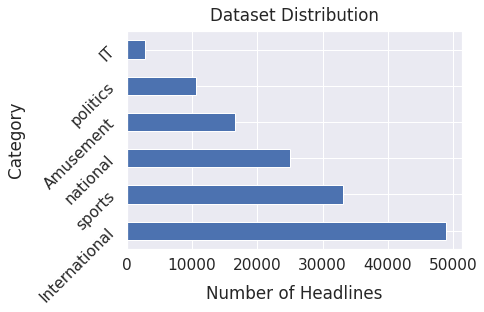

In [5]:
#To make statistical graphics Seaborn library is used which has been build on top of matplotlib and integrates closely with panda data structure. 

#printing the total number of headlines which will be equal to the number of rows in the panda
print(f'Total number of headlines: {len(data)}')

#The function Seaborn.set() is used to set font size in Seaborn plot, in order to set the font size parameter font_scale is passed in the set() function.
sns.set(font_scale=1.4)

#We are plotting the graph to get the insight how headlines are distributed among different categories.
#the below piece of code will plot the distribution of categories in a bar graph (IT, politics, Amusement, national, sports, Internaltionl) in a dataset
data['category'].value_counts().plot(kind='barh', figsize=(6, 4))

#to comprehend the above bar graph easily, we need to assign labels.
#The pyplot module of matplotlib has xlable() and ylable() function that can used to set the label for x axis and y axis. 
#And labeled function is passed as parameter to both the function, whose default value = ‘None’
#which is utilized  to provide spacing in points from axes bounding box comprised of ticks and labels of tick

#setting the xlable as "Number of Headlines" and labelapad =12
plt.xlabel("Number of Headlines", labelpad=12)

#setting the ylable as "Category" and labelapad =12
plt.ylabel("Category", labelpad=12)


#ytick function in matplotlib is generally used to either set or get the current tick locations and labels in the y axis and 
#we pass rotation = 45 to rotate the y axis ticks by 45-degrees as we could see (IT, politics, Amusement, national, sports, Internaltionl) are rotated

plt.yticks(rotation = 45)
#setting the title of graph of to be "Dataset Distribution"
plt.title("Dataset Distribution", y=1.02);

In [6]:
#printing the column names of the data frame
data.columns

Index(['headline', 'category', 'newspaper name'], dtype='object')

#Data Cleaning

In [7]:
#we could see that there are symbols like !, ... in the headline column of the dataframe data
print(data.head(20))

                                             headline   category  \
0            হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!  Amusement   
1                       এত দামি জুতা পরেন প্রিয়াঙ্কা!  Amusement   
2                     মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও  Amusement   
3            কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি  Amusement   
4          বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা  Amusement   
5   মোহিনী নাচের জাদুতে আগুন জ্বালালেন ঊর্বশী! (ভি...  Amusement   
6             প্রতারণা মামলায় সোনাক্ষীকে খুঁজছে পুলিশ  Amusement   
7   ‘ভালো অভিনেত্রী নয়, মা আদর্শ মানুষ হওয়ার পাঠ দ...  Amusement   
8                এবার শুটিং সেটে সালমানকে হত্যাচেষ্টা  Amusement   
9     শ্রীদেবীর মৃত্যুর ‘তদন্ত শেষ’, মৃতদেহ হস্তান্তর  Amusement   
10                                  মোদির পাশে তৈমুর!  Amusement   
11  প্রথম ছবি মুক্তির আগেই সাইবার দুনিয়া কাঁপাচ্ছে...  Amusement   
12                    প্রেমে পড়েছে মন প্রেমে পড়েছে...  Amusement   
13            মেয়ের ঠোঁটে চুমু দিয়ে সমালোচিত ঐশ্

In [8]:
# Cleaning Headline Column - This block of code is to remove unnecessary symbols present in headline column
# every language has associated unicode  character set related to it, for the language Bengali 
#it is  [^\u0980-\u09FF], we are replacing other symbols such as punctuation with space if it is not matching the bengali charater set
#^ - symbol used to filter out the characters which is not matching any character in [^\u0980-\u09FF]. 
#To implement this, cleaning_data function is created and one method of regex 'sub' is used to replace punctuation and other symbols in the headline

#defining the function cleaning_data which takes headline as a parameter.
def cleaning_data(row):
#re.sub is used to replace any wanted symbol from the headine and the result is stored in variable 'headlines'
      headlines = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
#returning the cleaned headline
      return headlines

# Apply the cleaning_data function to all the headlines, and storing the cleaned headline a new column 'cleaned',
#we make use of apply method in pandas to accomplish this
data['cleaned'] = data['headline'].apply(cleaning_data)  

#reviewing some of the cleaned data by printing it

#creating the list as below, which could be be used as index in dataframe
sample_data = [2000,5000,10000,20000,30000,35000,40000,45000,50000,60000,65000,70000,75000,80000,100000]

#for every element in sample_data, print the original headline which is column data.headline[i] 
#and cleaned data which is in data.cleaned[i] this could be done using for loop as implemented below

for i in sample_data: #taking 2000, 5000, 10000 ... until there is a element in sample_data

#printing category, original headline, cleaned headline, 
  print('Original: ',data.headline[i],'\nCleaned:',
           data.cleaned[i],'\n','Category:-- ',data.category[i],'\n')  
# we could see that ', :, '' are removed 

Original:  ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
Cleaned: ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
 Category:--  Amusement 

Original:  ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
Cleaned: ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
 Category:--  IT 

Original:  জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
Cleaned: জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
 Category:--  politics 

Original:  দ. কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
Cleaned: দ  কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
 Category:--  International 

Original:  ফ্লোরিডায় হামলাকারী ‘মানসিকভাবে অসুস্থ’: ট্রাম্প 
Cleaned: ফ্লোরিডায় হামলাকারী  মানসিকভাবে অসুস্থ   ট্রাম্প 
 Category:--  International 

Original:  সেরাটা দিতে পারলে সিরিজ জিতবে বাংলাদেশ: মাশরাফি 
Cleaned: সেরাটা দিতে পারলে সিরিজ জিতবে বাংলাদেশ  মাশরাফি 
 Category:--  sports 

Original:  সাকিব ফেরালেন শাই হোপকে 
Cleaned: সাকিব ফেরালেন শাই হোপকে 
 Category:--  sports 

Original:  কংগ্রেস সভাপতির পদ থেকে রাহুল গান্ধীর পদত্যাগ 
Cleaned: কংগ্রেস সভা

#Remove Low Length Data

In [9]:
# This block of code remove the row in a dataframe 'data' if the headline is less than 2 words

#lambda is nameless function in python, which is used to take each headline and split into words, this is accomplised by using split() function.
# Split() function - split a string into a list by using separator, the default separator is whitespace here.

#applying lambda to each row on the column cleaned and storing the result by creating new column 'length'.
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))


#The length of original dataset.
print('The length of original dataframe', len(data))

# We can Remove the headlines with less number of words, by using loc function of the panda and
# setting the filter criteria as data.length<2
dataset = data.loc[data.length>2]

#printring the length of dataset after dropping headline whose length is less than 2 
print('The length of dataset after dropping headlines',len(dataset))


#In pandas reset_index is used to set the index to default indexing that is from (0 to no of rows -1) 
#and used drop parameter = True to avoid insert old index value to insert as column in data fram
dataset = dataset.reset_index(drop = True)

#printing the number of headlines with less than 2 words which is 4098 and the newly created dataset
print("After Cleaning:","\nRemoved {} Small Headlines".format(len(data)-len(dataset)),
      "\nTotal Headlines:",len(dataset))

The length of original dataframe 136811
The length of dataset after dropping headlines 132713
After Cleaning: 
Removed 4098 Small Headlines 
Total Headlines: 132713


The below block is not part of project, but simply demonstrating how the for loop in the subsequent block works

In [11]:
#b=list(dataset.cleaned) #taking the cleaned dataset
#a=b[:2] #only 2 headline
#c=[] #empty list
#count=0 #initialize to zero
#for t in a: #iterate
  #count+=1
  #if count != 1:
    #print(t)
    #print(t.strip())
    #print('printing')
    #print(t.strip().split)
    #for word in t.strip().split():
      #print('wor')
      #print(word.strip().lower())
      #c.append(word)
  

হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই  কেন 
হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই  কেন
printing
<built-in method split of str object at 0x7f0e80c97cb0>
wor
হঠাৎ
wor
করে
wor
কেঁদে
wor
ফেললেন
wor
ঐশ্বরিয়া
wor
রাই
wor
কেন
এত দামি জুতা পরেন প্রিয়াঙ্কা 
এত দামি জুতা পরেন প্রিয়াঙ্কা
printing
<built-in method split of str object at 0x7f0e80cb69c0>
wor
এত
wor
দামি
wor
জুতা
wor
পরেন
wor
প্রিয়াঙ্কা


In [12]:
# This block of code create a function 'data_summary' which take the dataset datframe created above as input,
#that has cleaned headline and the length of data greater than 2

def data_summary(dataset):
    
    """
    This function will print the summary of the headlines and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int


    """
    #creating a list documents to store the number of headlines in each of the category 
    documents = []
    #creating a list words to store the number of words in each of the category 
    words = []
    #creating a list u_words to store the number of unique words in each of the category 
    u_words = []
    # taking each headline from dataset(1st for loop), then  perform strip on the headline to remove extra
    #space in string if any and splitting the string into words(for loop 2) and then applying strip function 
    #to each word and converting to lower case

    # for example if the headline is হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই  কেন 
    #list will have ['হঠাৎ', 'করে', 'কেঁদে', 'ফেললেন', 'ঐশ্বরিয়া', 'রাই',  'কেন' ]

    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]

    #printing few list of words

    print('Sample words', total_u_words[:9])
    
    #this will print the categories and number of headlines in each categories, 
    #it is just testing this statement is used in for loop below
    print(dataset.category.value_counts().to_dict())

    #In order to get the list of available categories, we loop through the dictionary using items() method and pick only key values of dictionary
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
   
    print(class_label)
  # find word list
    for label in class_label: #iterating through each label 
        
        #creating a list of words by:
        #matching the headlines associated with each category and creating list of words done above using two for loop
        #1st for loop - to get the headline
        #second for loop - remove extra space left and right of the headline using 'strip' and apply split function to split the string by whitespace to get each word
        #then remove spaces in each word and convert it into lower case

        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        
        #create a dictionary to keep the count of words
        counts = dict()

        #iterating through each word
        for word in word_list:
                #print(counts.get(word,0))
                #if the word is not already present in the dictionary it will return 0 (counts.get(word, 0), 
                #this happens when the word is inserted into dictionary initially otherwise corresponding value will be return and +1 
                #will be done if its again repeated in the list
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label) #printing the class name
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned)))) #printing the number of documents
        print("Number of Words:{}".format(len(word_list)))  #printing the number of words
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) #printing the number of unique word
        print("Most Frequent Words:\n") #most frequent word (10), the dictionary is sorted
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))    #Total Number of Unique Words       
   
    return documents,words,u_words,class_label #returning documents,words,u_words,class_label

#call the fucntion data_summary
documents,words,u_words,class_names = data_summary(dataset)    


Sample words ['হঠাৎ', 'করে', 'কেঁদে', 'ফেললেন', 'ঐশ্বরিয়া', 'রাই', 'কেন', 'এত', 'দামি']
{'International': 47885, 'sports': 30831, 'national': 24557, 'Amusement': 16067, 'politics': 10577, 'IT': 2796}
['International', 'sports', 'national', 'Amusement', 'politics', 'IT']

Class Name :  International
Number of Documents:47885
Number of Words:307354
Number of Unique Words:28710
Most Frequent Words:

নিহত	3398
না	2133
নিয়ে	1634
ট্রাম্প	1472
মার্কিন	1434
ও	1342
থেকে	1332
ভারতের	1212
যুক্তরাষ্ট্র	1208
ভারত	1192

Class Name :  sports
Number of Documents:30831
Number of Words:152852
Number of Unique Words:18581
Most Frequent Words:

বাংলাদেশ	1581
না	1122
জয়	883
বাংলাদেশের	873
শুরু	782
নিয়ে	689
সাকিব	672
ভারত	619
শেষ	603
দল	573

Class Name :  national
Number of Documents:24557
Number of Words:158042
Number of Unique Words:20710
Most Frequent Words:

না	1444
হবে	1292
ও	1215
প্রধানমন্ত্রী	1003
আজ	752
থেকে	617
কাদের	613
খালেদা	566
বিএনপি	557
নিয়ে	556

Class Name :  Amusement
Number of Documents:16

#Summary Visualization

#The total document,words, unique word obtained using above can be ploted to know how much it is distributed across each of the available category. That is Number of document, Number of words, Number of unique words across all the six categories

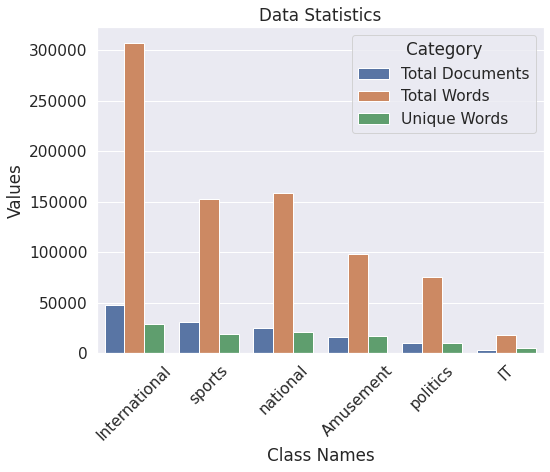

In [13]:
#creating dataframe data_matrix with documents,words, u_words,class_names)
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
#
#melt() function is useful to message a DataFrame into a format where one or more columns are identifier variables,
#while all other columns, considered measured variables, 
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
#specifying the height and width of figure 
plt.figure(figsize=(8, 6))
#to create a subplot within the graph 
ax = plt.subplot()

#creating bar graph with class Names as x and values as y, category as hue
sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')

#set the xlable for subplot as ClassNames
ax.set_xlabel('Class Names') 
#title as Data Statistics
ax.set_title('Data Statistics')

#rotating the class label by 45
ax.xaxis.set_ticklabels(class_names, rotation=45);

#Headline Length Distribution

The below code is created to analyse the length of the headline spread across the entire dataset

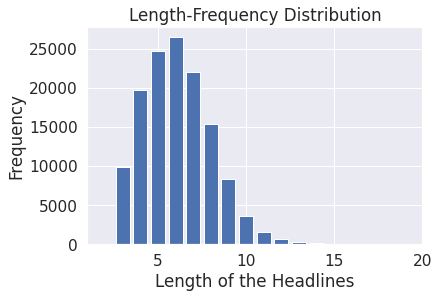

Maximum Length of a headline: 21
Minimum Length of a headline: 3
Average Length of a headline: 6.0


In [14]:
# Calculate the length of each of the each of the headline by applying the split function in each of the cleaned headlines and
#the length of each headline is stored in headlinelength column
dataset['HeadlineLength'] = dataset.cleaned.apply(lambda x:len(x.split()))

#dictionary is created
frequency = dict()
#iterated throught the Headlinelength, the key  is length and value is number of times that particular lenght is repeated in a dataset suppose headline of 
#lenght 7 is appeared thries then frequency[7]=3
for i in dataset.HeadlineLength:
    frequency[i] = frequency.get(i, 0)+1 #if the length is not already present 0 will be returned otherwise key will be added and assigned 1. If the key is already present +1 is done

#bar graph is plotted with keys (different length) and values (count of each length)
plt.bar(frequency.keys(), frequency.values(), color ="b")
#is used to get or set the x-limits of the current axes
plt.xlim(1, 20)
# in this notbook color is not working but it should work.
# xlable is Length of the Headlines'
plt.xlabel('Length of the Headlines')
#ylable frequency
plt.ylabel('Frequency')
#title 'Length-Frequency Distribution'
plt.title('Length-Frequency Distribution')
#to display the graph
plt.show()  

#printing the "Maximum Length of a headline: 
print(f"Maximum Length of a headline: {max(dataset.HeadlineLength)}")
print(f"Minimum Length of a headline: {min(dataset.HeadlineLength)}")
#"Maximum Length of a headline: 
print(f"Average Length of a headline: {round(np.mean(dataset.HeadlineLength),0)}")
#mean of headlinelength

#Lable Encoding and Dataset Splitting

#This function will take categories in dataframe 'dataset' and assign numerical value to each of the distinct categories and return the array as ouput of encoded label
# if 0 is for IT , 1 is for Amusement and if the categories are in the order ['IT', 'Amusement, 'IT','IT'] => [0,1,0,0]. We are categorical value into numerical 
#as it will be easier to work with

In [15]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================
                                       ## Set up training and test datasets-THA

def label_encoding(category,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        category: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    #LabelEncoder is a method provided by sklearn library, it is used to assign numerical values  0 - n-1 to distinct values of particular column 
    #for example as there are 6 categories, it will assign 1 to IT, 0 to Amusement. Where n is the number of distinct values in categories.

    #creating an LableEncoder class object
    le = LabelEncoder()
    #.fit will take a categorical column and converted into numerical values., in this case it takes categories and map numerical to each ofit
    le.fit(category)
    # the transform function will take category as input and transformed it into numerical labels such 0, 1 in the original dataframe
    encoded_labels = le.transform(category)
    #printing the sample encode labels
    labels = np.array(encoded_labels) # Converting into numpy 
    # Converting encoded_list into numpy array
    class_names =le.classes_ ## Define the class names again
    ## class names(categories) are defined again, this will store the distinct available categores
    #check if bool is true
    if bool == True:
  #printing the classes(categories)
        #we will examine how each category has been encoded into numerical values
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        # iterating through each value in sample data which is defined in earlier block of code
        for i in sample_data:
            print(category[i],' ', encoded_labels[i],'\n')
#the encoded labels that is converted into an array is returned. 
    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 
#===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 
#This function will take headlines and encoded lable(which is created for categories) as 
#input and split the dataset into train, validation and test data. 
def dataset_split(headlines,category):
    """
    This function will return the splitted (90%-10%-10%) feature vector . 
    
    Args:
        headlines: sequenced headlines 
        category: encoded lables (array) 
        
    Returns:
        X_train: training data 
        X_valid: validation data
        X_test : testing feature vector 
        y_train: training encoded labels (array) 
        y_valid: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """
# Splitting the dataset into training and testing data, in the ratio 90:10, we use train_test_split method provided by sklearn, 
#we choose random_state =0, so that the dataset will be choosen randomly as train and test dataset
    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    # Splitting the X,y obtained above again into training and testing data, in the ratio 80:10, we use train_test_split method provided by sklearn, 
#we choose random_state =0, so that the dataset will be choosen randomly as train and test dataset

    print(color.BOLD+"\nDataset Distribution:\n"+color.END) #creating the heading as "Dataset Distribution"
    print("\tSet Name","\t\tSize") #giving labels for the printing statement to make it meaning full
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines), #this will print the total number of headlines in the dataset
        "\n\tTraining\t\t",len(X_train), # Number of Traning headlines
        "\n\tTest\t\t\t",len(X_test), #Number of Test headlines 
        "\n\tValidation\t\t",len(X_valid)) #Number of validation headlines
    #print('Train records: ', len(x_train))
    #print('Test records:', len(x_test))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test #return X_train,X_valid,X_test,y_train,y_valid,y_test


In [16]:
#calling the function labels to the encode the categories value
labels = label_encoding(dataset.category,True)


			===== Label Encoding ===== 
Class Names:--> ['Amusement' 'IT' 'International' 'national' 'politics' 'sports']
Amusement   0 

IT   1 

politics   4 

International   2 

International   2 

sports   5 

sports   5 

International   2 

national   3 

International   2 

International   2 

International   2 

International   2 

International   2 

Amusement   0 



In [17]:
#calling the function dataset_split to generate train, valid and test data by passing the healine and labels
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(dataset.headline,labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 132713 
	Training		 95552 
	Test			 13272 
	Validation		 23889


In [ ]:
#just testing
print(len(X_train)) #length of X_train
print(len(X_test)) #length of Y_train

95552
13272


#Tokenization

In [22]:
#declaring some varibales, which could be used as parameters for the below methods
vocab_size = 57000 #assigning vocab_size =57000 
train_test_split = 64
max_length = 21# maximum length is assigned to 21 
#trunc_type='post'
padding_type='post' #padding type which is the argument to padsequence method is assigned post so the sequence will be padded after each sequence
oov_tok = "<OOV>" # this parameter if given in tokenizer class, it is added to word_index and used to replace misspelled and out-of-vocabulary words during text_to_sequence calls

#creating a function padded_headlines(which original headline, encoded sequence, padded sequence )
def padded_headlines(original,encoded,padded):
  '''
  print the samples padded headlines
  '''
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")  #printing "Encode Sequence"
  print(original,"\n",encoded) # printing original headline and encoded sequence version
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,original,"\n",padded)  # printing original headline and padded sequence version

In [27]:
# Train Data Tokenization
#There is a tokenizer class of keras is there which is utilized for vectorizing a text corpus(in our case it is the headline). 
#In this text is converted into integer sequence or it could create a vector that will have coefficient for every token in all the headlines in the form of binary values. 
# There are six arguments which could be passed for the tokenizer class, but for the scope of this project only num_words and oov_token has been passed.

#All the upcoming methods such as texts_to_sequence and pad_sequence done on dataset X_train
#creating an object for the class tokenizer
# this parameter if given in tokenizer class, it is added to word_index and used to replace misspelled and out-of-vocabulary words during text_to_sequence calls
#num_words=which is the maximum number of words to keep, based on frequency of the words, only the most common vocab_size -1 will be kept
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) 

#fit_on_text is a method of class tokenizer that has been used to update the text list's internal vocabulary, the result retun by this method can be use to find
#more information such as word_index, word_doc
#now we are passing X_train list obtained previous to the fit_on_text method.
tokenizer.fit_on_texts(X_train)

#unique value will be assigned to each word in the X_train which can be viewed by using tokenizer.word_index
word_index = tokenizer.word_index

#word_index : Is a dictionary, in which unique integer is assigned to each word

#texts_to_sequence is an another method of tokenizer which is used to represent words of headlines into sequence of integer (Since unique value is assigned to each word)
train_sequences = tokenizer.texts_to_sequences(X_train)
print('The length of sequence',type(train_sequences)) # printing the type  of sequence
print('The length of sequence',len(train_sequences))#printing thee length of sequence
print('The sample headline',X_train[2000]) #printing the sample headline
print('The coresponding sequence for the above sample headline',train_sequences[2000])  #printing the sample sequence for the sample headline

#the list of text (headlines) padded here is X_train
#pad_sequence is method which is used to pad each sequence of same length, since we are giving max_length=21, 
#every sequence will be padded to do 21 and its after the sequence since we give padding type as post 
#If maximum length is not given then longest sequence length will be taken.

train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

#just for testing, how actually pad_sequences works
print('The length of sequence',type(train_padded))# printing the type  of sequence
print('The length of sequence',len(train_padded)) #printing thee length of sequence
print('The sample headline',X_train[2000]) #printing the sample headline
print('The coresponding sequence for the above sample headline',train_padded[2000]) #printing the sample padded sequence for the sample headline


The length of sequence <class 'list'>
The length of sequence 95552
The sample headline নতুন বিজ্ঞাপনে পরীমনি
The coresponding sequence for the above sample headline [4325, 49, 27870, 984, 468, 10540, 3418]
The length of sequence <class 'numpy.ndarray'>
The length of sequence 95552
The sample headline নতুন বিজ্ঞাপনে পরীমনি
The coresponding sequence for the above sample headline [ 4325    49 27870   984   468 10540  3418     0     0     0     0     0
     0     0     0     0     0     0     0     0     0]


 #============================== Tokenizer Info =================================

 #As mentioned above tokenizer will be used to more information such as 
 #1) Word_counts is a dictionary which has key as 'WORDS' and the value corresponds to the count of that word in a dataset
 #2) word_docs - how many documents(in this case headlines) contain the particualr word
 #3) word_index : is a dictionary, which have unique integers assigned to each word.
 #4) This document_count will give the total number of headlines used for fitting the tokenizer

In [28]:

(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)

#creating a function tokenizer_info, to iterate through the above dictionary objects
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool) #sorting the dictionary in descending  order of value
  for w,c in ordered[:10]: #sample of ordered dictionary, by iterating through 10 elements
    print(w,"\t",c)# printing the words(key) and counts (values) it will be descending order as it is sorted 
  #=============================== Print all the information =========================
print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   #printing the heading as "Tokenizer Info"
print("Words --> Counts:") # printing "Words --> Counts:"

#calling the above defined function by passing the dictionary word_counts and passing bool as True 
#which will print first 10 elements of dictionary in a sorted order descending
tokenizer_info(word_counts,bool =True ) 

# printing "\nWords --> Documents:"
print("\nWords --> Documents:") 
#calling the above defined function by passing the dictionary word_docs and passing bool as True 
#which will print first 10 elements of dictionary in a sorted order descending
tokenizer_info(word_docs,bool =True )

#calling the above defined function by passing the dictionary word_index and passing bool as True 
#which will print first 10 elements of dictionary in a sorted order descending
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    

#printing document_count 
print("\nTotal Documents -->",document_count)

#printing the length of word_index which is the number of unique tokens/words
print(f"Found {len(word_index)} unique tokens")

			====== Tokenizer Info ======
Words --> Counts:
না 	 4125
নিয়ে 	 3213
ও 	 3201
নিহত 	 2683
নতুন 	 2288
হবে 	 2193
থেকে 	 2165
বাংলাদেশ 	 1741
সঙ্গে 	 1692
করে 	 1510

Words --> Documents:
না 	 4031
নিয়ে 	 3204
ও 	 3173
নিহত 	 2681
নতুন 	 2273
হবে 	 2182
থেকে 	 2162
বাংলাদেশ 	 1737
সঙ্গে 	 1684
করে 	 1499

Words --> Index:
মিসিসিপিতে 	 55055
ইয়ামেনি 	 55054
ওকিনাওয়ায় 	 55053
শনাক্তকরণের 	 55052
আবিষ্কৃত 	 55051
বেলজীয় 	 55050
পুজদেমনকে 	 55049
‘গান’ 	 55048
বেস 	 55047
ইনস্ট্রুমেন্টাল 	 55046

Total Documents --> 95552
Found 55055 unique tokens


In [29]:
#calling the function padded_headline to see the encoded and the padded sequence
padded_headlines(X_train[10],train_sequences[10],train_padded[10]) 


			====== Encoded Sequences ====== 

মোদির পাশে তৈমুর! 
 [4172, 2216, 6238, 301, 2629, 5925]

			====== Paded Sequences ======
 মোদির পাশে তৈমুর! 
 [4172 2216 6238  301 2629 5925    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [30]:
# Validation Data Tokenization
#repeating step for validation data similar to Traning data
#All the upcoming methods such as texts_to_sequence and pad_sequence done on dataset X_valid
#'The length of X_valid'
print('The length of X_valid', len(X_valid))
#'Examing few values of X_valid'
print('Examing few values of X_valid', X_valid[:10])

#the list of text (headlines) padded here is X_valid
#texts_to_sequence is an another method of tokenizer which is used to represent words of headlines into sequence of integer
#(Since unique value is assigned to each word)
validation_sequences = tokenizer.texts_to_sequences(X_valid)

#padding the valid dataset sequence
#pad_sequence is method which is used to pad each sequence of same length, since we are giving max_length=21, 
#every sequence will be padded to do 21 and its after the sequence since we give padding type as post 
#If maximum length is not given then longest sequence length will be taken.
validation_padded = pad_sequences(validation_sequences, padding=padding_type , maxlen=max_length)

#calling the function padded_headlines, to see  padded sequence for Valid dataset
padded_headlines(X_valid[61569],validation_sequences[1],validation_padded[1]) 


The length of X_valid 23889
Examing few values of X_valid 61569         জেলবন্দি তামিলদের মুক্তি দিতে পারেন রাজাপক্ষে
13353     লেজুরবৃত্তি রাজনীতির কারণে ছাত্ররা শিক্ষকদের স...
92283                                 হোসাফ প্রেসিডেন্ট গলফ
99420                                      নেশন্স কাপ মিশরে
91403                                   জাপান গেলো কিশোরীরা
122406    ভারতের প্রধানমন্ত্রী নরেন্দ্র মোদির সঙ্গে হাছা...
81559                           তালিবানের জয়ের ধারা অব্যাহত
68587                 পুতুলের সঙ্গে সম্পর্কে স্ত্রীর সম্মতি
95250                              সিজেকেএস প্রথম বিভাগ হকি
34497                            শচীনের চেয়েও জনপ্রিয় ধোনি!
Name: headline, dtype: object

			====== Encoded Sequences ====== 

জেলবন্দি তামিলদের মুক্তি দিতে পারেন রাজাপক্ষে 
 [1, 1410, 161, 18585, 4123, 2124, 2521, 2, 851]

			====== Paded Sequences ======
 জেলবন্দি তামিলদের মুক্তি দিতে পারেন রাজাপক্ষে 
 [    1  1410   161 18585  4123  2124  2521     2   851     0     0     0
     0     0     0    

In [31]:
# Test Data Tokenization
#repeating step for test data similar to Traning data
#All the upcoming methods such as texts_to_sequence and pad_sequence done on dataset X_test

#the list of text (headlines) padded here is X_test
#texts_to_sequence is an another method of tokenizer which is used to represent words of headlines into sequence of integer
#(Since unique value is assigned to each word)
test_sequences = tokenizer.texts_to_sequences(X_test)

#padding the test dataset sequence
#pad_sequence is method which is used to pad each sequence of same length, since we are giving max_length=21, 
#every sequence will be padded to do 21 and its after the sequence since we give padding type as post 
#If maximum length is not given then longest sequence length will be taken.
test_padded = pad_sequences(test_sequences, padding=padding_type , maxlen=max_length)

#calling the function padded_headlines, to see  padded sequence for Valid dataset
padded_headlines(X_test[100],test_sequences[100],test_padded[100]) 


			====== Encoded Sequences ====== 

দেখতে পারেন শ্রীদেবীর সেরা ৪ ছবি (ভিডিও) 
 [822, 466, 778, 54443]

			====== Paded Sequences ======
 দেখতে পারেন শ্রীদেবীর সেরা ৪ ছবি (ভিডিও) 
 [  822   466   778 54443     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0]


In [33]:
# Labels Tokenization
#label_tokenizer = Tokenizer()
#label_tokenizer.fit_on_texts(dataset.category)

#assigning the y_train to train_label_seq
train_label_seq = y_train

#assigning the y_valid to valid_label_seq
valid_label_seq = y_valid


#assigning they_test to testing_label_seq
testing_label_seq = y_test

#print(train_label_seq.shape)
#print(valid_label_seq.shape)
#print(testing_label_seq.shape)

#Model Defination

#we are building the model layer by layer such as Embedding, Bidirectional, Dense, Flatten and Dense
#The model used has the architecture consists of a embedding layer(input_length = 21, embedding_dim = 64), GRU layer(n_units = 64), two dense layer (n_units = 24, 6), a dropout and a softmax layer. The Architecture
# Embedding Layer: Here we are building a embeddding layer initially, which requires all individual documents to be of same length which is 21.
# we have done this by padding every sequence of same length
#Dense layer is added for create a deeply connected layer in neural network in which each of neurons this layer receives input all the neuron of previous layer. 
#flatten layer is used to flatten the input 
#to handle backwards input processing birdirectional layer is used. 

In [39]:
#now we created the relevant datasets and necessary padded has been done, we will move to building the model.
#Ideally a global state is managed by keras which is used to implement the Functional model-building Api 
#and to autogenerate layers. More memory will be consumed by the global state if many models are created, 
#calling this clear_session will releases the global state 
#which inturn avoid clutter from old model and layer as the memory is limited.
keras.backend.clear_session()
accuracy_threshold = 0.97
vocab_size = 57000
# 64 is kind of a generic choice that should work well
# for various-sized character vocabularies. There is a danger of overfitting 
# when the size of the embedding layer exceeds the size of the vocabulary.
embedding_dim = 64 
max_length = 21 #assigning max _length be 21
num_category = 6 #assigning to 6

class myCallback(keras.callbacks.Callback): #this class has been create to implement keras callback, Callbacks can be passed to keras methods such as fit
  def on_epoch_end(self, epoch, logs={}): #epoch is 10, fun
      if(logs.get('accuracy')>accuracy_threshold): #train the model until the accuracy reaches 0.97
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True #if it reaches the accuracy stop training the model



#ModelCheckpoint- This is used along with training using model.fit() to save a model or model at some interval so the model or weights can be loaded 
#later to proceed the training from the saved state


#we are building the model layer by layer such as Embedding, Bidirectional, Dense, Flatten and Dense
#The model used has the architecture consists of a embedding layer(input_length = 21, embedding_dim = 64), GRU layer(n_units = 64), two dense layer (n_units = 24, 6), a dropout and a softmax layer. The Architecture
# Embedding Layer: Here we are building a embeddding layer initially, which requires all individual documents to be of same length which is 21.
# we have done this by padding every sequence of same length
#Dense layer is added for create a deeply connected layer in neural network in which each of neurons this layer receives input all the neuron of previous layer. 
#flatten layer is used to flatten the input 
#to handle backwards input processing birdirectional layer is used. 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(GRU(64,dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])

model.save( 'model.h5' ) #saving the model state in VM of the notebook
#ModelCheckpoint- This is used along with training using model.fit() to save a model or model at some interval so the model or weights can be loaded 
#later to proceed the training from the saved state

checkpoint = keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
#calling the function if the accuracy reached is saturated
acc_callback = myCallback()
callback_list = [acc_callback, checkpoint] 

#compile the model by giving loss as loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary() #summary of the model created 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 64)            3648000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49920     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 3,701,166
Trainable params: 3,701,166
Non-trainable params: 0
______________________________________________

Training the model for the fixed number of epochs using fit method, by passing the train_padded, train_label_seq(y_train) and validataion data -Data on which to evaluate the loss and any model metrics at the end of each epoch#by setting verbosity mode as 1, and callbacks to be called [acc_callback, checkpoint] during training. 

In [40]:
#epoch is taken as 10
num_epochs = 10
#The batch size is taken 64
batch = 64
#Traning the model using fit method 
history = model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/10
1493/1493 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.7456
Epoch 1: val_accuracy improved from -inf to 0.83063, saving model to model.h5
1493/1493 [==============================] - 151s 98ms/step - loss: 0.6912 - accuracy: 0.7456 - val_loss: 0.4815 - val_accuracy: 0.8306
Epoch 2/10
1493/1493 [==============================] - ETA: 0s - loss: 0.3297 - accuracy: 0.8833
Epoch 2: val_accuracy improved from 0.83063 to 0.84085, saving model to model.h5
1493/1493 [==============================] - 162s 108ms/step - loss: 0.3297 - accuracy: 0.8833 - val_loss: 0.4553 - val_accuracy: 0.8408
Epoch 3/10
1493/1493 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9259
Epoch 3: val_accuracy did not improve from 0.84085
1493/1493 [==============================] - 154s 103ms/step - loss: 0.2120 - accuracy: 0.9259 - val_loss: 0.4852 - val_accuracy: 0.8391
Epoch 4/10
1493/1493 [==============================] - ETA: 0s - loss: 0.1568 - accur

##Confusion Matrix

This block of code is used to construct confustion matrix which is used to visualize and summarize the prediction of the model created. Initally predictions are made by passing test_padded created earlier in the code in model.predict method, then numpy argmax is constructing by taking the maximum value predicted. Then confusion matrix is created with y_pred and testing_label. Dataframe as below is created to make easy plotting of the matrix. The accuracy is also calcualted using accuracy_score.

[[1.56013995e-01 3.31357936e-03 8.40156913e-01 1.76918402e-04
  1.08156004e-04 2.30443155e-04]
 [5.55351471e-05 7.62310151e-07 1.42540870e-04 1.18353916e-03
  1.54903523e-06 9.98616099e-01]
 [4.83196573e-07 3.92262278e-10 2.25391409e-06 1.47371138e-05
  8.41538039e-09 9.99982476e-01]
 ...
 [1.77400898e-06 4.49340121e-08 9.98929560e-01 9.93798370e-04
  1.84137662e-06 7.30229731e-05]
 [4.66251413e-06 5.97528382e-09 5.64154587e-04 3.62449437e-02
  4.67760765e-06 9.63181555e-01]
 [1.12993587e-06 2.89847344e-06 9.99977231e-01 1.72629261e-05
  1.18662024e-06 2.45832268e-07]]


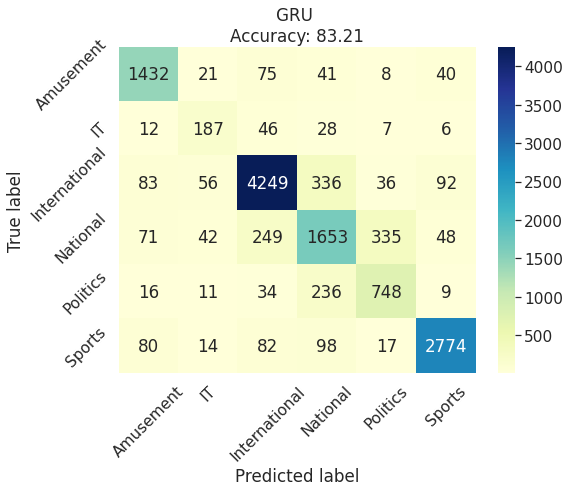

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
# load the Saved model from directory

#predicting the accuracy of model by using the predict method which take test_padded as 
#predict passes the input vector(test_padded) through the model and returns the output tensor for each datapoint. 
#Since the  last layer of the  model is a single Dense neuron, the output for any datapoint is a single value
predictions = model.predict(test_padded)
#printing predictions
print(predictions)

#applying np.argmax to the predictions
y_pred = np.argmax(predictions, axis=1)

#The confusion matrix is built by confusion_matrix method
#confusion_matrix
#A confusion matrix is used to describe the perfromance of the model created. 
cm = confusion_matrix(testing_label_seq, y_pred) 

# Transforming to dataframe for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

#plotting the graph
plt.figure(figsize=(8,6))
#sns heatmap is used to create a coloured encoded matrix 
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('GRU \nAccuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
#True label is in x axis
plt.ylabel('True label')
#predicted label is in y axis
plt.xlabel('Predicted label')
#rotating the x ticks by 45 degree
plt.xticks(rotation = 45)
#rotating the y ticks by 45 degree
plt.yticks(rotation = 45)
#to show the graph created
plt.show()

The below piece of code is used to calculate the precision, recall, f1-score for each of the categories, by creating dataframe bt taking testing_label_seq and the y_pred calculated from the previous block of code. 
These score are very useful measuare of the success of prediction when the dataset is unevenly distributed. In simple, measurement of result relevancy is precision and recall is a meacure of how many truly relevant results are returned. f1 score is the mean of precision and recall. These scores provide the insight of how well the classification model make correct prediction.  

In [45]:

#panda dataframe is created with 
report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = y_pred, output_dict=True)).transpose()

#creating the column to be on the right side as categories.
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})

#precision, recall and f1 score are calculated for each of the categories.
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,84.53,88.56,86.50,1617.000000
IT,56.50,65.38,60.62,286.000000
International,89.74,87.57,88.64,4852.000000
National,69.11,68.93,69.02,2398.000000
Politics,64.99,70.97,67.85,1054.000000
Sports,93.43,90.51,91.95,3065.000000
accuracy,83.21,83.21,83.21,0.832052
macro avg,76.38,78.65,77.43,13272.000000
weighted avg,83.55,83.21,83.34,13272.000000


The data set is converted into dataframe and a graph is generated to see the data distribution. There are 6 distinct categories, the graph Dataset Distribution which indicates Number of Headlines vs Category, which shows that international category has more number of headlines followed by sports, national, amusement, politics and IT. Once the data is cleaned by removing the unwanted symbol and dropping the headline of length less than 2 is removed, number of headlines, words, unique words are calculated by each of the categories. There are more number of unique words contributed by category ‘International’ and least is contributed by ‘IT’. The length frequency distribution of headline is also analyzed where 21 is the maximum length. As mentioned in introduction dataset are manipulated (tokenized, padded, text to sequence) to feed into the model. The input to the model is padded to left as we have taken post type in padded sequence. The output of model compiler is 
Total params: 3,701,166
Trainable params: 3,701,166
Non-trainable params: 0
I have taken epoch size as 10 and batch as 64, the model is trained with trained and validation data. The value accuracy of each epoch is between .82- .84 it is not improving much. The val_accuracy did not improve from 0.84085 to precise while training the mode. Then the trained model with accuracy around.84 is tested by making prediction for the test data which is padded and confusion matrix is created with predicted value which shows that the accuracy is around 83.21. By seeing the confusion matrix we could see that International categories is predicted more accurately followed by sports, national,amusement, politics and for IT is very low. This is making sense since most of the headline category belongs to International and only some to IT. The dataset Is not very well distributed along the categories. Even Precision, recall and f1 shows high value for International and low value for IT. 
 
The accuracy is okay for this imbalanced dataset but it needs to be improved one way it could be improved is by increasing the number of dataset which have equally distributed categories. Since the prediction is based on word embeddings only categories which provide more word to the dataset will be predicted correctly we need the words in every category in a balanced manner and also we can fine tune the parameters such epoch and batch to improve the trained model.

 


References: 

https://seaborn.pydata.org/generated/seaborn.set_context.html
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
https://en.wikipedia.org/wiki/Bengali_(Unicode_block)
https://docs.python.org/3/library/re.html
https://www.geeksforgeeks.org/matplotlib-pyplot-xlabels-in-python/
https://scikit-learn.org/stable/modules/generated/
sklearn.preprocessing.LabelEncoder.html#:~:text=class%20sklearn.preprocessing.,and%20not%20the%20input%20X%20.

https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/

https://towardsdatascience.com/text-classification-in-keras-part-2-how-to-use-the-keras-tokenizer-word-representations-fd571674df23
https://stackoverflow.com/questions/56333914/uses-of-embedding-embedding-layer-in-deep-learning
I have referred all the labs and homework code also
